# Exploring scalar multiplication graphs

In [1]:
from functools import partial

import networkx as nx
import matplotlib.pyplot as plt

from pyecsca.ec.model import ShortWeierstrassModel
from pyecsca.ec.point import Point, InfinityPoint
from pyecsca.ec.curve import EllipticCurve
from pyecsca.ec.params import DomainParameters
from pyecsca.ec.mod import mod
from pyecsca.ec.mult import *
from pyecsca.ec.countermeasures import *
from pyecsca.sca.re.rpa import multiple_graph
from pyecsca.sca.re.epa import graph_plot_prepare, graph_to_check_inputs

#from epare.config import all_configs, Config, MultIdent, CountermeasureIdent

%matplotlib ipympl

In [2]:
model = ShortWeierstrassModel()
coords = model.coordinates["projective"]
p = 0x0259
a = mod(0x021a, p)
b = mod(0x01e2, p)
gx = mod(0x008a, p)
gy = mod(0x0076, p)

infty = InfinityPoint(coords)
g = Point(coords, X=gx, Y=gy, Z=mod(1, p))
curve = EllipticCurve(model, coords, p, infty, dict(a=a, b=b))
params = DomainParameters(curve, g, 0x22d, 1)

In [3]:
def check_inputs(precomp_ctx, full_ctx, out, *args, **kwargs):
    ci = graph_to_check_inputs(precomp_ctx, full_ctx, out, *args, **kwargs)
    for formula, elems in sorted(ci.items()):
        print(formula, "\t", sorted(elems))

## Simple LTR

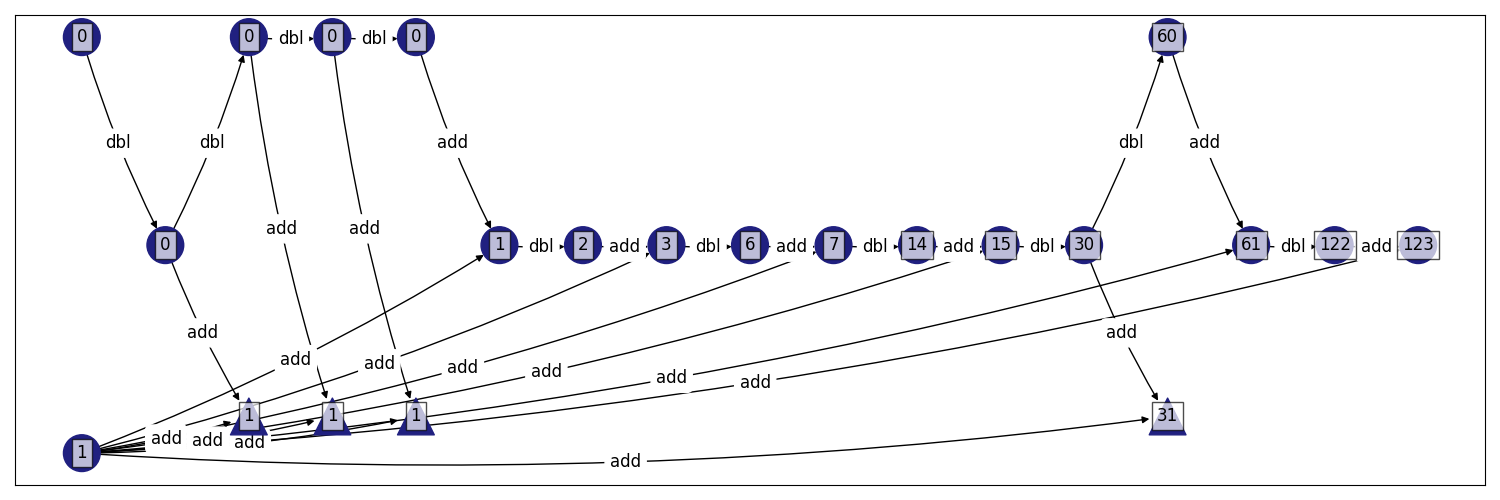

In [4]:
graph_ltr = multiple_graph(123, params, LTRMultiplier, partial(LTRMultiplier, always=True, complete=True))
G = graph_plot_prepare(*graph_ltr)
fig, ax = plt.subplots(figsize=(15, 5))
nx.display(G, canvas=ax, node_size=700)
fig.tight_layout()
plt.show()

### init and multiply

In [5]:
check_inputs(*graph_ltr, check_condition="all", precomp_to_affine=True)

add 	 [(0, 1), (2, 1), (6, 1), (14, 1), (30, 1), (60, 1), (122, 1)]
affine 	 [(123,)]
dbl 	 [(0,), (1,), (3,), (7,), (15,), (30,), (61,)]


In [6]:
check_inputs(*graph_ltr, check_condition="all", precomp_to_affine=False)

add 	 [(0, 1), (2, 1), (6, 1), (14, 1), (30, 1), (60, 1), (122, 1)]
affine 	 [(123,)]
dbl 	 [(0,), (1,), (3,), (7,), (15,), (30,), (61,)]


In [7]:
check_inputs(*graph_ltr, check_condition="necessary", precomp_to_affine=True)
# TODO: Should or should not contain (1, 2) in add?

add 	 [(0, 1), (2, 1), (6, 1), (14, 1), (60, 1), (122, 1)]
affine 	 [(123,)]
dbl 	 [(0,), (1,), (3,), (7,), (15,), (30,), (61,)]


In [8]:
check_inputs(*graph_ltr, check_condition="necessary", precomp_to_affine=False)

add 	 [(0, 1), (2, 1), (6, 1), (14, 1), (60, 1), (122, 1)]
affine 	 [(123,)]
dbl 	 [(0,), (1,), (3,), (7,), (15,), (30,), (61,)]


### init-only

In [9]:
check_inputs(*graph_ltr, check_condition="all", precomp_to_affine=True, use_init=True, use_multiply=False)

affine 	 []


In [10]:
check_inputs(*graph_ltr, check_condition="all", precomp_to_affine=False, use_init=True, use_multiply=False)

affine 	 []


In [11]:
check_inputs(*graph_ltr, check_condition="necessary", precomp_to_affine=True, use_init=True, use_multiply=False)

affine 	 []


In [12]:
check_inputs(*graph_ltr, check_condition="necessary", precomp_to_affine=False, use_init=True, use_multiply=False)

affine 	 []


### multiply-only

In [13]:
check_inputs(*graph_ltr, check_condition="all", precomp_to_affine=True, use_init=False, use_multiply=True)

add 	 [(0, 1), (2, 1), (6, 1), (14, 1), (30, 1), (60, 1), (122, 1)]
affine 	 [(123,)]
dbl 	 [(0,), (1,), (3,), (7,), (15,), (30,), (61,)]


In [14]:
check_inputs(*graph_ltr, check_condition="all", precomp_to_affine=False, use_init=False, use_multiply=True)

add 	 [(0, 1), (2, 1), (6, 1), (14, 1), (30, 1), (60, 1), (122, 1)]
affine 	 [(123,)]
dbl 	 [(0,), (1,), (3,), (7,), (15,), (30,), (61,)]


In [15]:
check_inputs(*graph_ltr, check_condition="necessary", precomp_to_affine=True, use_init=False, use_multiply=True)

add 	 [(0, 1), (2, 1), (6, 1), (14, 1), (60, 1), (122, 1)]
affine 	 [(123,)]
dbl 	 [(0,), (1,), (3,), (7,), (15,), (30,), (61,)]


In [16]:
check_inputs(*graph_ltr, check_condition="necessary", precomp_to_affine=False, use_init=False, use_multiply=True)

add 	 [(0, 1), (2, 1), (6, 1), (14, 1), (60, 1), (122, 1)]
affine 	 [(123,)]
dbl 	 [(0,), (1,), (3,), (7,), (15,), (30,), (61,)]


## FixedWindow

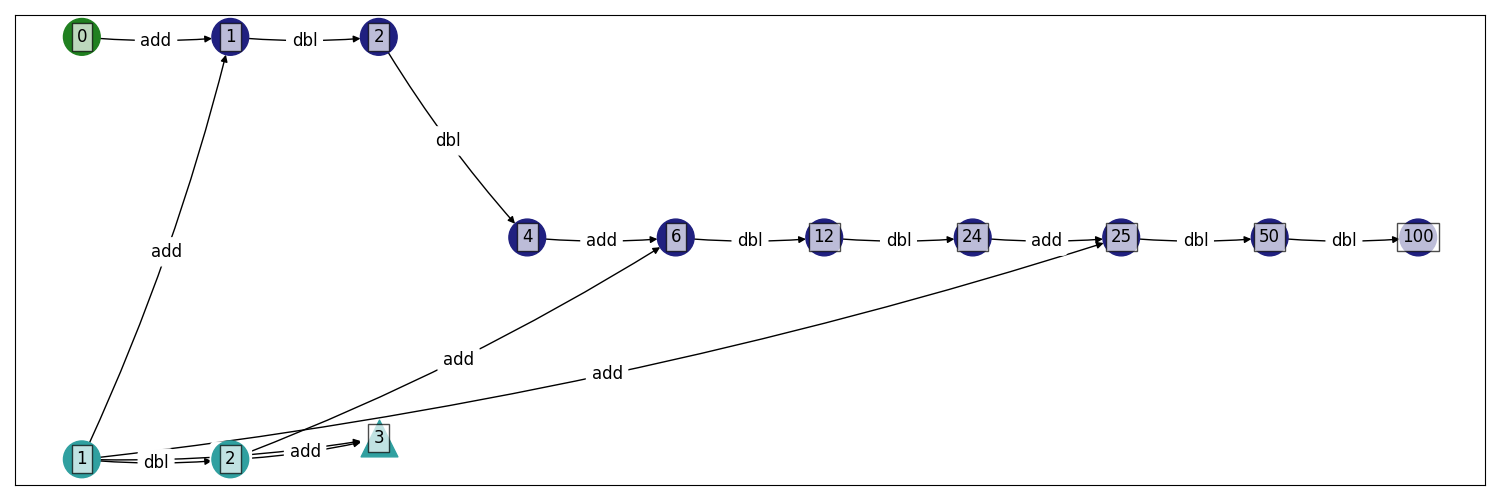

In [17]:
graph_fw = multiple_graph(100, params, FixedWindowLTRMultiplier, partial(FixedWindowLTRMultiplier, m=4))
G = graph_plot_prepare(*graph_fw)
fig, ax = plt.subplots(figsize=(15, 5))
nx.display(G, canvas=ax, node_size=700)
fig.tight_layout()
plt.show()

### init and multiply

In [18]:
check_inputs(*graph_fw, check_condition="all", precomp_to_affine=True)

add 	 [(0, 1), (2, 1), (4, 2), (24, 1)]
affine 	 [(1,), (2,), (3,), (100,)]
dbl 	 [(1,), (2,), (6,), (12,), (25,), (50,)]


In [19]:
check_inputs(*graph_fw, check_condition="all", precomp_to_affine=False)

add 	 [(0, 1), (2, 1), (4, 2), (24, 1)]
affine 	 [(100,)]
dbl 	 [(1,), (2,), (6,), (12,), (25,), (50,)]


In [20]:
check_inputs(*graph_fw, check_condition="necessary", precomp_to_affine=True)
# TODO: Should or should not contain (1, 2) in add?

add 	 [(0, 1), (4, 2), (24, 1)]
affine 	 [(1,), (2,), (3,), (100,)]
dbl 	 [(1,), (2,), (6,), (12,), (25,), (50,)]


In [21]:
check_inputs(*graph_fw, check_condition="necessary", precomp_to_affine=False)

add 	 [(0, 1), (4, 2), (24, 1)]
affine 	 [(100,)]
dbl 	 [(1,), (2,), (6,), (12,), (25,), (50,)]


### init-only

In [22]:
check_inputs(*graph_fw, check_condition="all", precomp_to_affine=True, use_init=True, use_multiply=False)

add 	 [(2, 1)]
affine 	 [(1,), (2,), (3,)]
dbl 	 [(1,)]


In [23]:
check_inputs(*graph_fw, check_condition="all", precomp_to_affine=False, use_init=True, use_multiply=False)

add 	 [(2, 1)]
affine 	 []
dbl 	 [(1,)]


In [24]:
check_inputs(*graph_fw, check_condition="necessary", precomp_to_affine=True, use_init=True, use_multiply=False)

affine 	 [(1,), (2,), (3,)]
dbl 	 [(1,)]


In [25]:
check_inputs(*graph_fw, check_condition="necessary", precomp_to_affine=False, use_init=True, use_multiply=False)

affine 	 []


### multiply-only

In [26]:
check_inputs(*graph_fw, check_condition="all", precomp_to_affine=True, use_init=False, use_multiply=True)

add 	 [(0, 1), (4, 2), (24, 1)]
affine 	 [(100,)]
dbl 	 [(1,), (2,), (6,), (12,), (25,), (50,)]


In [27]:
check_inputs(*graph_fw, check_condition="all", precomp_to_affine=False, use_init=False, use_multiply=True)

add 	 [(0, 1), (4, 2), (24, 1)]
affine 	 [(100,)]
dbl 	 [(1,), (2,), (6,), (12,), (25,), (50,)]


In [28]:
check_inputs(*graph_fw, check_condition="necessary", precomp_to_affine=True, use_init=False, use_multiply=True)

add 	 [(0, 1), (4, 2), (24, 1)]
affine 	 [(100,)]
dbl 	 [(1,), (2,), (6,), (12,), (25,), (50,)]


In [29]:
check_inputs(*graph_fw, check_condition="necessary", precomp_to_affine=False, use_init=False, use_multiply=True)

add 	 [(0, 1), (4, 2), (24, 1)]
affine 	 [(100,)]
dbl 	 [(1,), (2,), (6,), (12,), (25,), (50,)]


## Comb

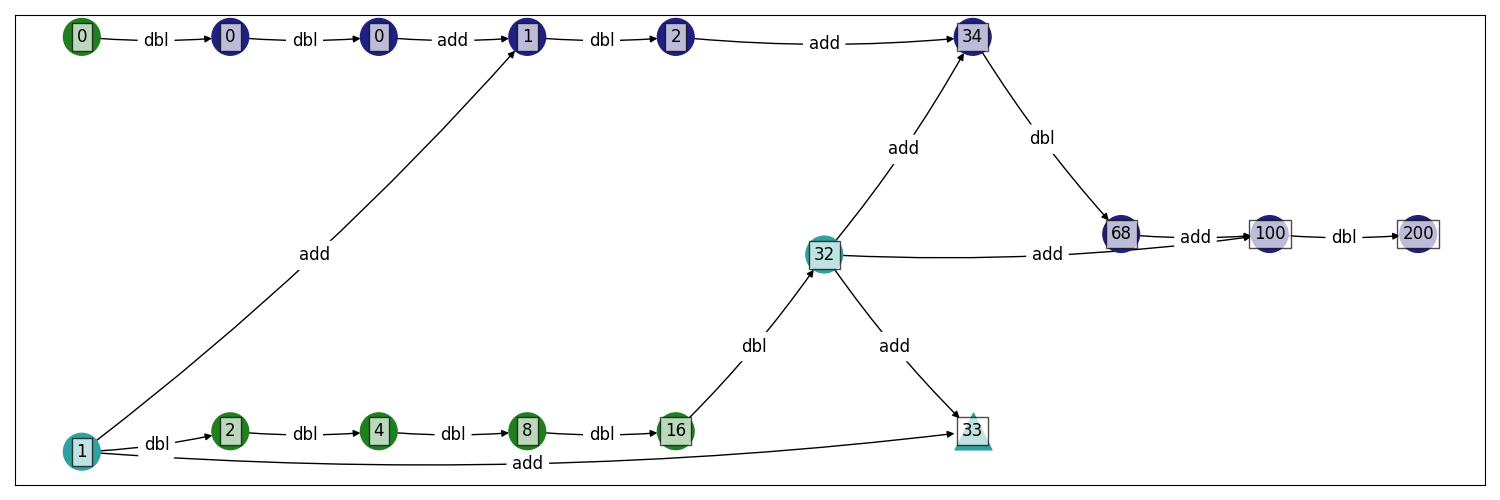

In [30]:
graph_comb = multiple_graph(200, params, CombMultiplier, partial(CombMultiplier, width=2, always=False))
G = graph_plot_prepare(*graph_comb)
fig, ax = plt.subplots(figsize=(15, 5))
nx.display(G, canvas=ax, node_size=700)
fig.tight_layout()
plt.show()

### init and multiply

In [31]:
check_inputs(*graph_comb, check_condition="all", precomp_to_affine=True)
# OK

add 	 [(0, 1), (1, 32), (2, 32), (68, 32)]
affine 	 [(1,), (32,), (33,), (200,)]
dbl 	 [(0,), (1,), (2,), (4,), (8,), (16,), (34,), (100,)]


In [32]:
check_inputs(*graph_comb, check_condition="all", precomp_to_affine=False)
# OK

add 	 [(0, 1), (1, 32), (2, 32), (68, 32)]
affine 	 [(200,)]
dbl 	 [(0,), (1,), (2,), (4,), (8,), (16,), (34,), (100,)]


In [33]:
check_inputs(*graph_comb, check_condition="necessary", precomp_to_affine=True)
# TODO: Hmm, shouldn't there be an (add (1, 32)) here? Because "precomp_to_affine=True" should say that all precomp results are "neccessary". Thus, 33 is necessary from this POV

add 	 [(0, 1), (2, 32), (68, 32)]
affine 	 [(1,), (32,), (33,), (200,)]
dbl 	 [(0,), (1,), (2,), (4,), (8,), (16,), (34,), (100,)]


In [34]:
check_inputs(*graph_comb, check_condition="necessary", precomp_to_affine=False)
# OK

add 	 [(0, 1), (2, 32), (68, 32)]
affine 	 [(200,)]
dbl 	 [(0,), (1,), (2,), (4,), (8,), (16,), (34,), (100,)]


### init-only

In [35]:
check_inputs(*graph_comb, check_condition="all", precomp_to_affine=True, use_init=True, use_multiply=False)
# OK

add 	 [(1, 32)]
affine 	 [(1,), (32,), (33,)]
dbl 	 [(1,), (2,), (4,), (8,), (16,)]


In [36]:
check_inputs(*graph_comb, check_condition="all", precomp_to_affine=False, use_init=True, use_multiply=False)
# OK

add 	 [(1, 32)]
affine 	 []
dbl 	 [(1,), (2,), (4,), (8,), (16,)]


In [37]:
check_inputs(*graph_comb, check_condition="necessary", precomp_to_affine=True, use_init=True, use_multiply=False)
# TODO: Hmm, shouldn't there be an (add (1, 32)) here? Because "precomp_to_affine=True" should say that all precomp results are "neccessary". Thus, 33 is necessary from this POV

affine 	 [(1,), (32,), (33,)]
dbl 	 [(1,), (2,), (4,), (8,), (16,)]


In [38]:
check_inputs(*graph_comb, check_condition="necessary", precomp_to_affine=False, use_init=True, use_multiply=False)
# OK

affine 	 []


### multiply-only

In [39]:
check_inputs(*graph_comb, check_condition="all", precomp_to_affine=True, use_init=False, use_multiply=True)
# OK

add 	 [(0, 1), (2, 32), (68, 32)]
affine 	 [(200,)]
dbl 	 [(0,), (1,), (34,), (100,)]


In [40]:
check_inputs(*graph_comb, check_condition="all", precomp_to_affine=False, use_init=False, use_multiply=True)
# OK

add 	 [(0, 1), (2, 32), (68, 32)]
affine 	 [(200,)]
dbl 	 [(0,), (1,), (34,), (100,)]


In [41]:
check_inputs(*graph_comb, check_condition="necessary", precomp_to_affine=True, use_init=False, use_multiply=True)
# OK

add 	 [(0, 1), (2, 32), (68, 32)]
affine 	 [(200,)]
dbl 	 [(0,), (1,), (34,), (100,)]


In [42]:
check_inputs(*graph_comb, check_condition="necessary", precomp_to_affine=False, use_init=False, use_multiply=True)
# OK

add 	 [(0, 1), (2, 32), (68, 32)]
affine 	 [(200,)]
dbl 	 [(0,), (1,), (34,), (100,)]
